<a href="https://colab.research.google.com/github/teenwolf395/L6/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
import os
import shutil

# Шаг 1: Загружаем kaggle.json
print("Пожалуйста, загрузите файл kaggle.json:")
uploaded = files.upload()

# Проверяем, что файл загружен
if 'kaggle.json' not in uploaded:
    print("Ошибка: файл kaggle.json не найден среди загруженных файлов")
else:
    print("Файл kaggle.json успешно загружен")

    # Шаг 2: Настраиваем Kaggle API
    source_path = 'kaggle.json'
    destination_dir = os.path.expanduser('~/.kaggle')
    destination_path = os.path.join(destination_dir, 'kaggle.json')

    # Создаем директорию, если не существует
    os.makedirs(destination_dir, exist_ok=True)

    # Перемещаем файл
    shutil.move(source_path, destination_path)

    # Устанавливаем правильные права доступа
    os.chmod(destination_path, 0o600)

    print("Kaggle API настроен успешно")

    # Шаг 3: Скачиваем датасет
    print("Скачиваем датасет")
    !kaggle datasets download -d chik0di/health-and-lifestyle-dataset

    # Шаг 4: Распаковываем
    import zipfile
    with zipfile.ZipFile('health-and-lifestyle-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

    print("Датасет готов к использованию!")

Пожалуйста, загрузите файл kaggle.json:


Saving kaggle.json to kaggle.json
Файл kaggle.json успешно загружен
Kaggle API настроен успешно
Скачиваем датасет
Dataset URL: https://www.kaggle.com/datasets/chik0di/health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.10M [00:00<?, ?B/s]
100% 2.10M/2.10M [00:00<00:00, 779MB/s]
Датасет готов к использованию!


In [3]:
import pandas as pd

Health = pd.DataFrame()
try:
    if os.path.getsize('health_lifestyle_dataset.csv') > 0:
      Health = pd.read_csv('health_lifestyle_dataset.csv')
      type(Health)
      print('Файл проимпортирован\n')
    else:
      print('Файл пустой')
except OSError as e:
    print('Файла не существует')

Файл проимпортирован



In [4]:
print(Health.isnull().sum())

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64


In [5]:
Health = Health.drop(columns=['id'])

In [6]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2



1. Названия колонок:
['age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']

2. Типы данных:
age                    int64
gender                object
bmi                  float64
daily_steps            int64
sleep_hours          float64
water_intake_l       float64
calories_consumed      int64
smoker                 int64
alcohol                int64
resting_hr             int64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
family_history         int64
disease_risk           int64
dtype: object

3. Форма датасета (строки, колонки):
(100000, 15)

=== ПОДРОБНАЯ ИНФОРМАЦИЯ (info()) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   

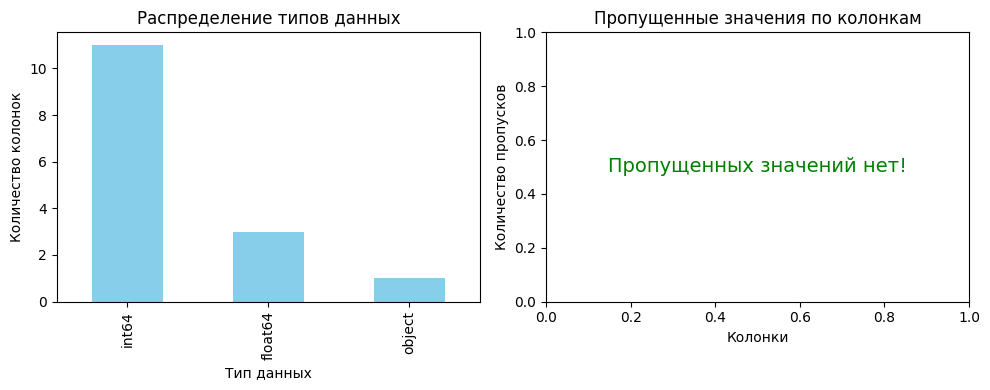


=== ГЕНЕРАЦИЯ ПОЛНОГО ОТЧЕТА ===


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 12.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Анализ завершен!


In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(Health)

# 1. Базовая информация о колонках
print("\n1. Названия колонок:")
print(df.columns.tolist())

print("\n2. Типы данных:")
print(df.dtypes)

print("\n3. Форма датасета (строки, колонки):")
print(df.shape)

# 2. Подробная информация с помощью info()
print("\n=== ПОДРОБНАЯ ИНФОРМАЦИЯ (info()) ===")
df.info()

# 3. Статистика по числовым колонкам
print("\n=== СТАТИСТИКА ПО ЧИСЛОВЫМ КОЛОНКАМ ===")
print(df.describe())

# 4. Статистика по всем колонкам (включая категориальные)
print("\n=== СТАТИСТИКА ПО ВСЕМ КОЛОНКАМ ===")
print(df.describe(include='all'))

# 5. Просмотр первых строк для понимания данных
print("\n=== ПЕРВЫЕ 5 СТРОК ДАТАСЕТА ===")
print(df.head())

# 6. Проверка на пропущенные значения
print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
print(df.isnull().sum())

# 7. Уникальные значения для каждой колонки
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")

# 8. Дополнительная информация о каждой колонке
print("\n=== ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ПО КАЖДОЙ КОЛОНКЕ ===")
for column in df.columns:
    print(f"\n--- {column} ---")
    print(f"Тип данных: {df[column].dtype}")
    print(f"Количество non-null значений: {df[column].count()}")
    print(f"Количество уникальных значений: {df[column].nunique()}")

    if df[column].dtype in ['int64', 'float64']:
        print(f"Минимальное значение: {df[column].min()}")
        print(f"Максимальное значение: {df[column].max()}")
        print(f"Среднее значение: {df[column].mean():.2f}")

    if df[column].dtype == 'object':
        print(f"Пример значений: {df[column].iloc[:3].tolist()}")

# 9. Визуальное представление информации о данных
print("\n=== ВИЗУАЛЬНОЕ ПРЕДСТАВЛЕНИЕ ===")
import matplotlib.pyplot as plt

# Информация о типах данных
type_counts = df.dtypes.value_counts()
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
type_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество колонок')


plt.subplot(1, 2, 2)
missing_values = df.isnull().sum()
if (missing_values > 0).any():
    missing_values[missing_values > 0].plot(kind='bar', color='lightcoral')
    plt.title('Пропущенные значения по колонкам')
    plt.xlabel('Колонки')
    plt.ylabel('Количество пропусков')
else:
    # Если пропусков нет, показываем сообщение
    plt.text(0.5, 0.5, 'Пропущенных значений нет!',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=14, color='green')
    plt.title('Пропущенные значения по колонкам')
    plt.xlabel('Колонки')
    plt.ylabel('Количество пропусков')

plt.tight_layout()
plt.show()

# 10. Использование pandas-profiling для полного отчета (раскомментируйте если нужно)

from ydata_profiling import ProfileReport

print("\n=== ГЕНЕРАЦИЯ ПОЛНОГО ОТЧЕТА ===")
profile = ProfileReport(df, title="Полный отчет о датасете")
profile.to_file("report.html")  # Сохраняем в файл

print("Анализ завершен!")

In [8]:
# Установка необходимых библиотек
!pip install seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("🔍 ЗАПУСК КОМПЛЕКСНОГО EDA АНАЛИЗА")
print("=" * 60)

🔍 ЗАПУСК КОМПЛЕКСНОГО EDA АНАЛИЗА


In [9]:
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ КОЛОНК")
print("=" * 50)

# Выбираем только числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Числовые колонки: {list(numeric_cols)}")

stats_summary = []
for col in numeric_cols:
    stats_summary.append({
        'Колонка': col,
        'Медиана': df[col].median(),
        'СКО': df[col].std(),
        'Асимметрия': df[col].skew(),
        'Эксцесс': df[col].kurtosis(),
        'Квартиль 25%': df[col].quantile(0.25),
        'Квартиль 75%': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25)
    })

stats_df = pd.DataFrame(stats_summary)
print( stats_df.round(3))

СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ КОЛОНК
Числовые колонки: ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']
              Колонка  Медиана       СКО  Асимметрия  Эксцесс  Квартиль 25%  \
0                 age     48.0    17.887       0.001   -1.201          33.0   
1                 bmi     29.0     6.353      -0.004   -1.201          23.5   
2         daily_steps  10468.0  5483.632       0.003   -1.201        5729.0   
3         sleep_hours      6.5     2.022       0.002   -1.201           4.7   
4      water_intake_l      2.8     1.297      -0.001   -1.194           1.6   
5   calories_consumed   2603.0   807.289      -0.004   -1.197        1906.0   
6              smoker      0.0     0.401       1.493    0.228           0.0   
7             alcohol      0.0     0.458       0.873   -1.238           0.0   
8          resting_hr     74.0    

In [10]:
print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ КОЛОНОК")
print("=" * 50)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Категориальные колонки: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Топ-5 самых частых значений:")
    print(df[col].value_counts().head())

АНАЛИЗ КАТЕГОРИАЛЬНЫХ КОЛОНОК
Категориальные колонки: ['gender']

--- gender ---
Количество уникальных значений: 2
Топ-5 самых частых значений:
gender
Male      50132
Female    49868
Name: count, dtype: int64


РАСПРЕДЕЛЕНИЕ




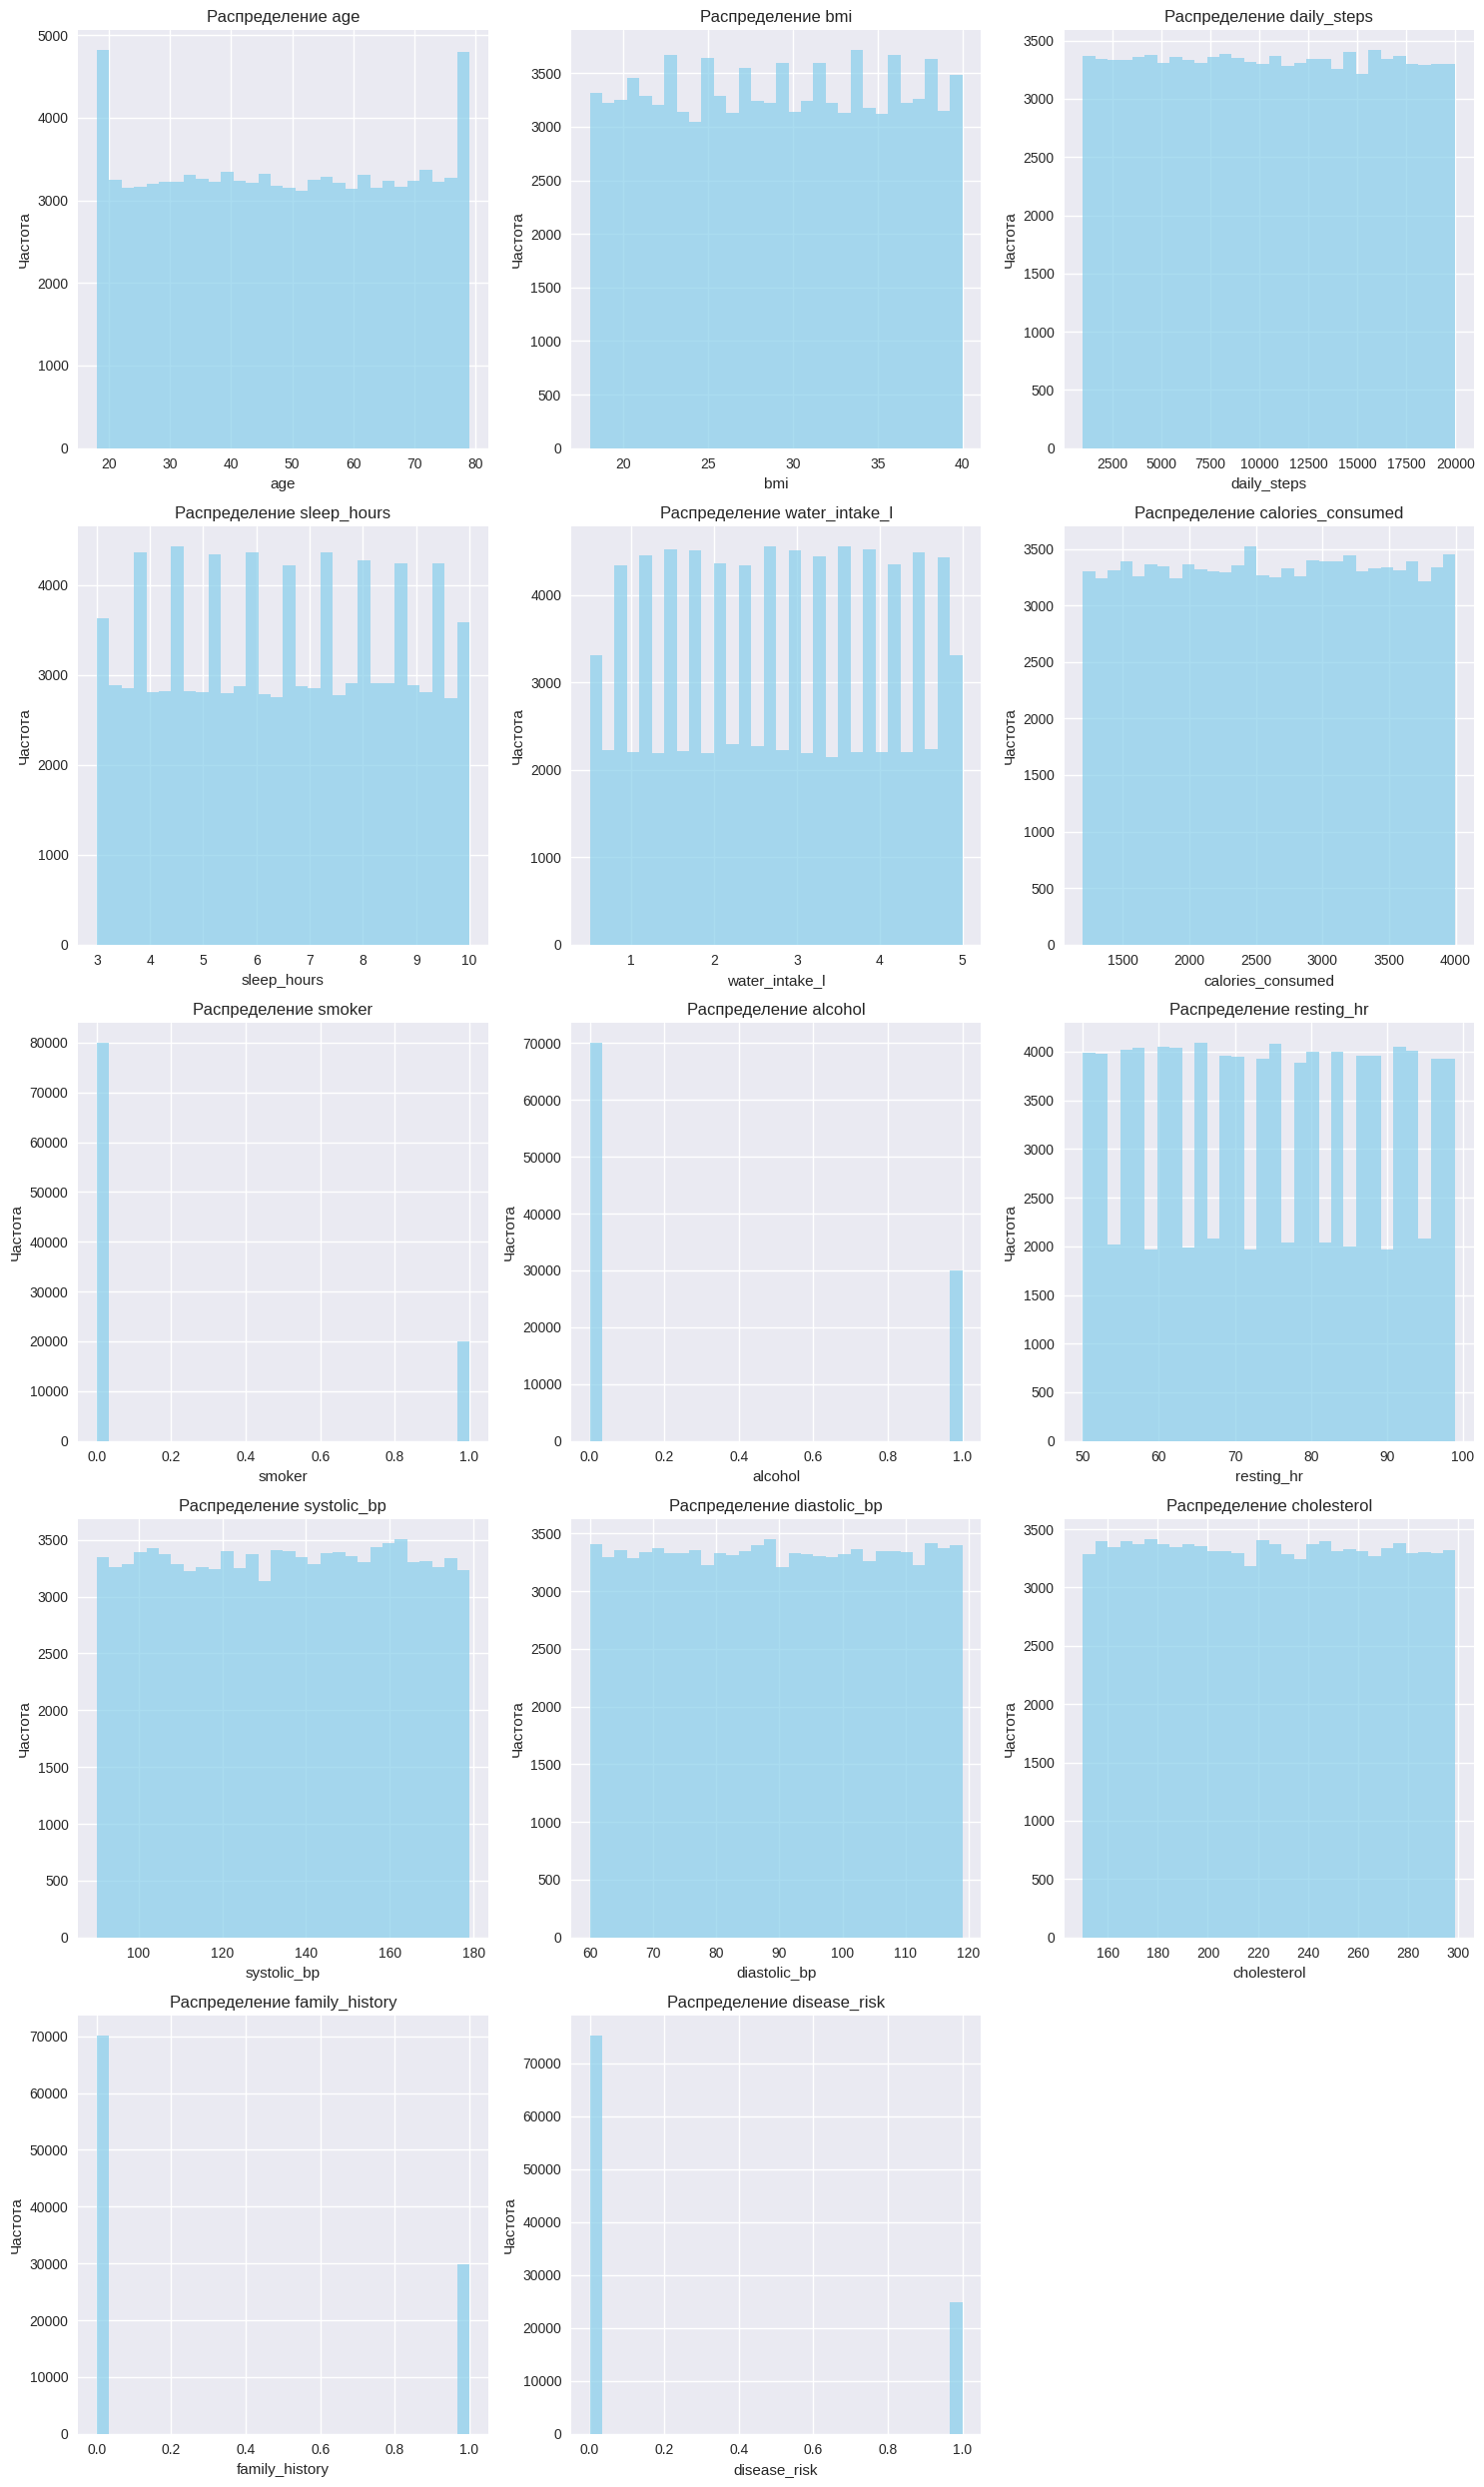

In [11]:
print("РАСПРЕДЕЛЕНИЕ")
print("\n")

# Гистограммы для числовых колонок
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
            axes[i].set_title(f'Распределение {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')

    # Скрываем пустые subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

🚨 АНАЛИЗ ВЫБРОСОВ
              Колонка  Выбросы  Процент
0                 age        0    0.000
1                 bmi        0    0.000
2         daily_steps        0    0.000
3         sleep_hours        0    0.000
4      water_intake_l        0    0.000
5   calories_consumed        0    0.000
6              smoker    20094   20.094
7             alcohol        0    0.000
8          resting_hr        0    0.000
9         systolic_bp        0    0.000
10       diastolic_bp        0    0.000
11        cholesterol        0    0.000
12     family_history        0    0.000
13       disease_risk    24821   24.821


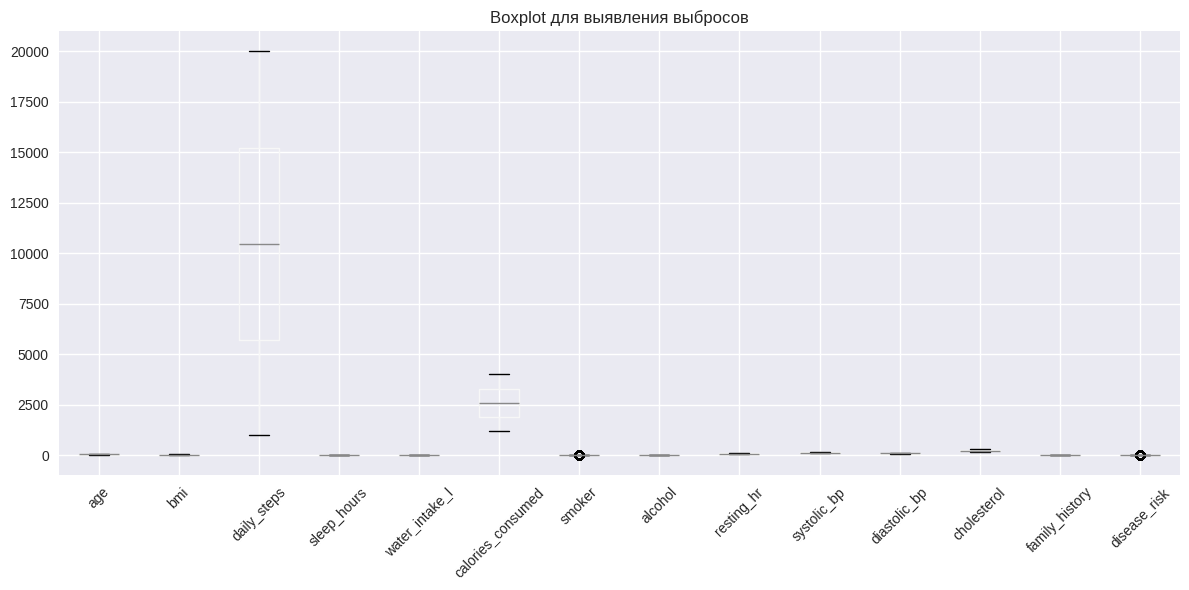

In [12]:
print("🚨 АНАЛИЗ ВЫБРОСОВ")
print("=" * 50)

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_summary = []
for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col].dropna())
    outlier_percent = (len(outliers) / len(df[col].dropna())) * 100
    outliers_summary.append({
        'Колонка': col,
        'Выбросы': len(outliers),
        'Процент': outlier_percent
    })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df)

# Boxplot для визуализации выбросов
if len(numeric_cols) > 0:
    plt.figure(figsize=(12, 6))
    df[numeric_cols].boxplot()
    plt.title('Boxplot для выявления выбросов')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



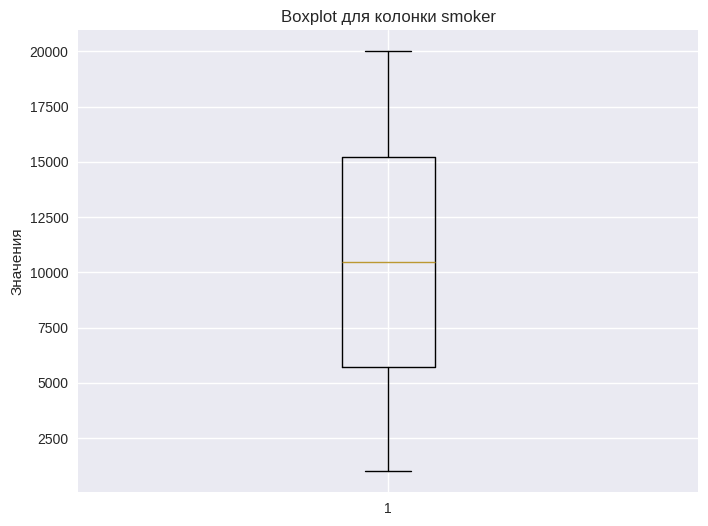

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(8, 6))
plt.boxplot(df['daily_steps'])
plt.title('Boxplot для колонки smoker')
plt.ylabel('Значения')
plt.show()

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
Матрица корреляций:
                     age    bmi  daily_steps  sleep_hours  water_intake_l  \
age                1.000  0.001        0.005        0.000          -0.006   
bmi                0.001  1.000        0.002        0.001          -0.004   
daily_steps        0.005  0.002        1.000       -0.001          -0.001   
sleep_hours        0.000  0.001       -0.001        1.000           0.002   
water_intake_l    -0.006 -0.004       -0.001        0.002           1.000   
calories_consumed -0.003  0.002        0.000        0.001          -0.008   
smoker            -0.002 -0.003        0.000        0.001           0.002   
alcohol           -0.001  0.002        0.003       -0.006           0.004   
resting_hr         0.001 -0.006        0.004        0.003           0.001   
systolic_bp        0.001  0.001       -0.002        0.000          -0.003   
diastolic_bp       0.000 -0.003       -0.004        0.002          -0.001   
cholesterol        0.001  0.002   

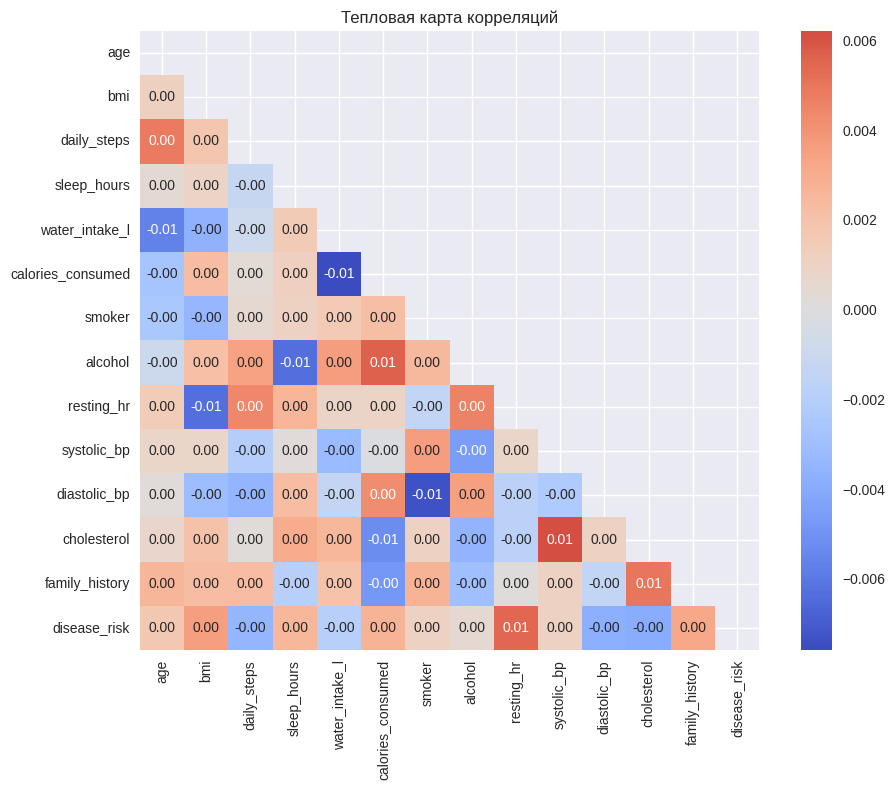


 Сильных корреляций не обнаружено


In [14]:
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("=" * 50)

if len(numeric_cols) > 1:
    # Матрица корреляций
    correlation_matrix = df[numeric_cols].corr()
    print("Матрица корреляций:")
    print(correlation_matrix.round(3))

    # Тепловая карта корреляций
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.2f')
    plt.title('Тепловая карта корреляций')
    plt.tight_layout()
    plt.show()

    # Поиск сильных корреляций
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr = correlation_matrix.iloc[i, j]
            if abs(corr) > 0.7:
                strong_correlations.append({
                    'Колонка 1': correlation_matrix.columns[i],
                    'Колонка 2': correlation_matrix.columns[j],
                    'Корреляция': corr
                })

    if strong_correlations:
        print("\nСИЛЬНЫЕ КОРРЕЛЯЦИИ (|r| > 0.7):")
        strong_corr_df = pd.DataFrame(strong_correlations)
        print(strong_corr_df.round(3))
    else:
        print("\n Сильных корреляций не обнаружено")

🔄 АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПЕРЕМЕННЫМИ


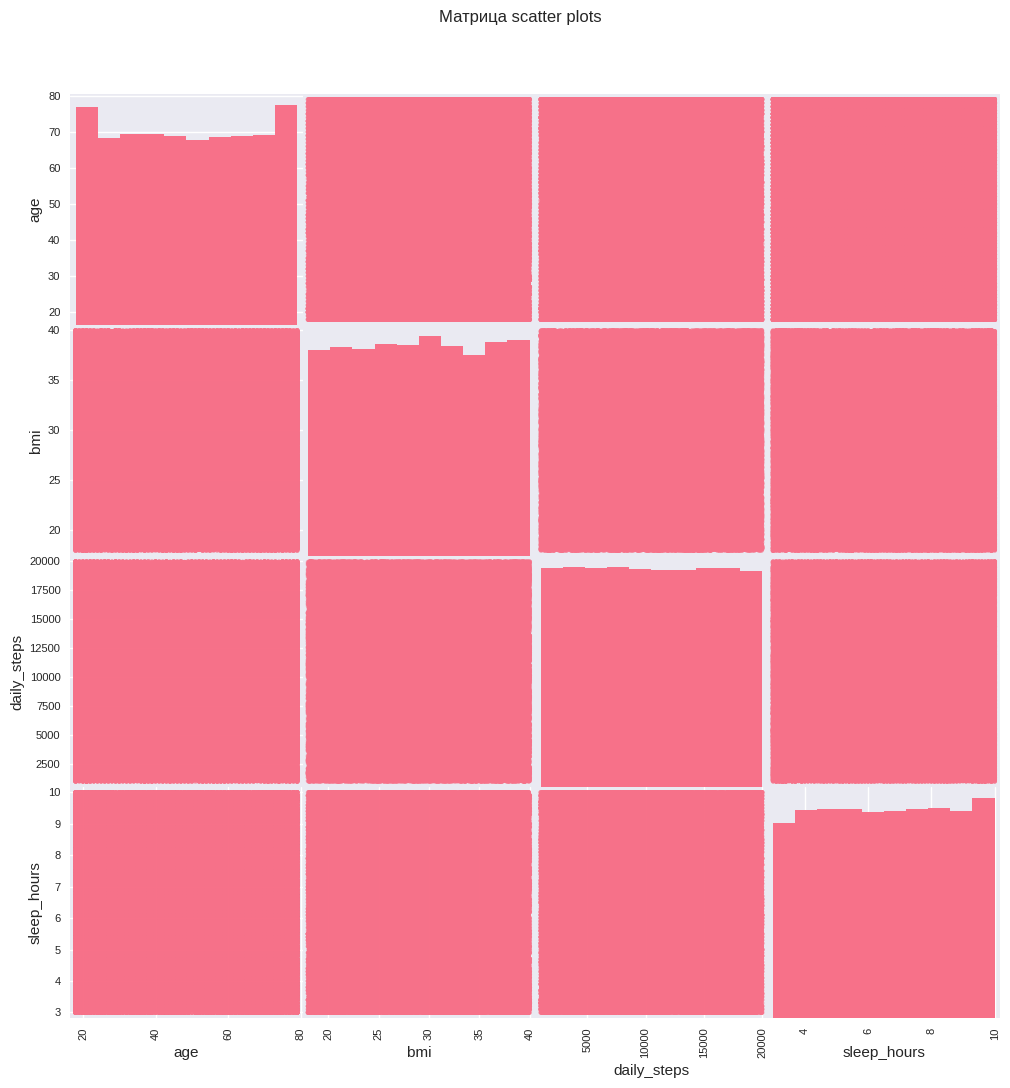

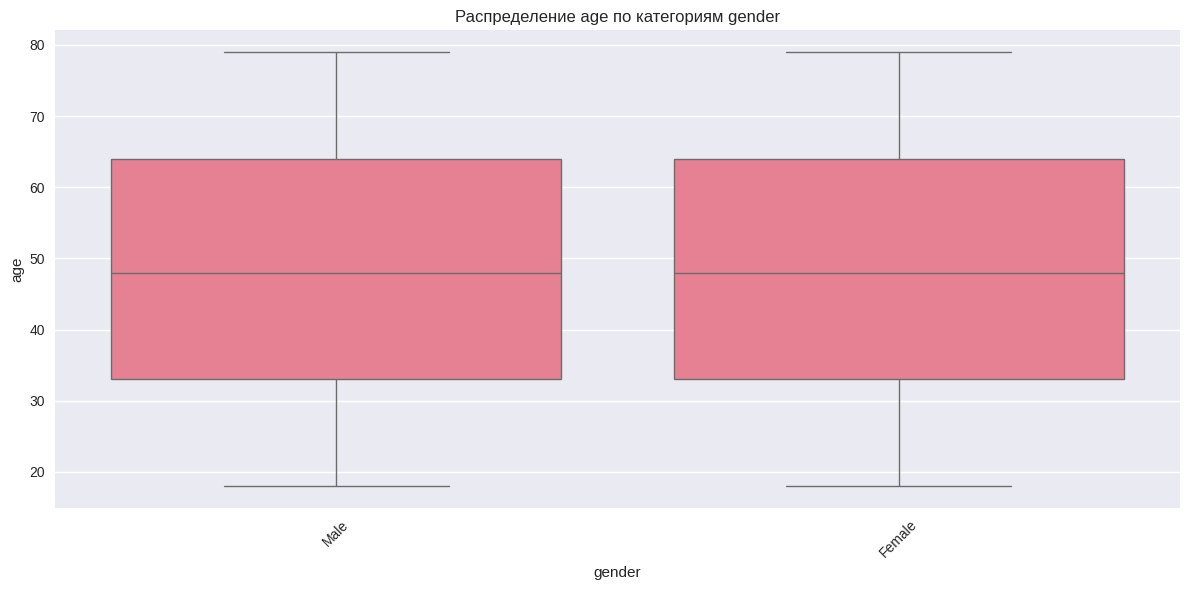

In [15]:
print("🔄 АНАЛИЗ ВЗАИМОСВЯЗЕЙ МЕЖДУ ПЕРЕМЕННЫМИ")
print("=" * 50)

# Scatter plot для числовых переменных
if len(numeric_cols) >= 2:
    # Берем первые 4 числовые колонки для scatter matrix
    scatter_cols = numeric_cols[:4]
    pd.plotting.scatter_matrix(df[scatter_cols], alpha=0.6, figsize=(12, 12))
    plt.suptitle('Матрица scatter plots', y=0.95)
    plt.show()

# Анализ категориальных vs числовых переменных
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    cat_col = categorical_cols[0]
    num_col = numeric_cols[0]

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=cat_col, y=num_col)
    plt.title(f'Распределение {num_col} по категориям {cat_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
print("🎯 ФИНАЛЬНЫЙ ОТЧЕТ EDA")
print("=" * 60)

print("📋 ОСНОВНЫЕ ВЫВОДЫ:")
print(f"• Общий размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"• Числовых колонок: {len(numeric_cols)}")
print(f"• Категориальных колонок: {len(categorical_cols)}")
print(f"• Пропущенных значений: {df.isnull().sum().sum()}")

if len(numeric_cols) > 0:
    high_skew = stats_df[abs(stats_df['Асимметрия']) > 1]['Колонка'].tolist()
    if high_skew:
        print(f"• Колонки с высокой асимметрией: {high_skew}")

if 'outliers_df' in locals():
    high_outliers = outliers_df[outliers_df['Процент'] > 5]['Колонка'].tolist()
    if high_outliers:
        print(f"• Колонки с большим количеством выбросов (>5%): {high_outliers}")

print("\n💡 РЕКОМЕНДАЦИИ ПО ДАЛЬНЕЙШЕМУ АНАЛИЗУ:")
recommendations = []
if df.isnull().sum().sum() > 0:
    recommendations.append("• Обработать пропущенные значения")
if high_skew:
    recommendations.append("• Рассмотреть преобразование skewed переменных")
if high_outliers:
    recommendations.append("• Исследовать выбросы и решить как с ними поступить")

if not recommendations:
    recommendations.append("• Данные готовы для построения моделей ML")
    recommendations.append("• Провести feature engineering")
    recommendations.append("• Разделить данные на train/test")

for rec in recommendations:
    print(rec)

print("\n" + "=" * 60)
print("EDA АНАЛИЗ ЗАВЕРШЕН! 🎉")

🎯 ФИНАЛЬНЫЙ ОТЧЕТ EDA
📋 ОСНОВНЫЕ ВЫВОДЫ:
• Общий размер датасета: 100000 строк, 15 колонок
• Числовых колонок: 14
• Категориальных колонок: 1
• Пропущенных значений: 0
• Колонки с высокой асимметрией: ['smoker', 'disease_risk']
• Колонки с большим количеством выбросов (>5%): ['smoker', 'disease_risk']

💡 РЕКОМЕНДАЦИИ ПО ДАЛЬНЕЙШЕМУ АНАЛИЗУ:
• Рассмотреть преобразование skewed переменных
• Исследовать выбросы и решить как с ними поступить

EDA АНАЛИЗ ЗАВЕРШЕН! 🎉


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

if 'gender' in Health.columns:
    print(f"Уникальные значения до преобразования: {Health['gender'].unique()}")

    # Кодируем текстовые значения M/F в числа
    gender_encoder = LabelEncoder()
    Health['gender'] = gender_encoder.fit_transform(Health['gender'])

    # Создаем mapping для обратного преобразования
    gender_mapping = {i: label for i, label in enumerate(gender_encoder.classes_)}
    print(f"Преобразование: {gender_mapping}")

    print(f"Уникальные значения после преобразования: {sorted(Health['gender'].unique())}")
    print(f"Распределение после: {Health['gender'].value_counts().to_dict()}")
else:
    print(f"Колонка GENDER не найдена в датасете")


Уникальные значения до преобразования: ['Male' 'Female']
Преобразование: {0: 'Female', 1: 'Male'}
Уникальные значения после преобразования: [np.int64(0), np.int64(1)]
Распределение после: {1: 50132, 0: 49868}


In [18]:
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                100000 non-null  int64  
 1   gender             100000 non-null  int64  
 2   bmi                100000 non-null  float64
 3   daily_steps        100000 non-null  int64  
 4   sleep_hours        100000 non-null  float64
 5   water_intake_l     100000 non-null  float64
 6   calories_consumed  100000 non-null  int64  
 7   smoker             100000 non-null  int64  
 8   alcohol            100000 non-null  int64  
 9   resting_hr         100000 non-null  int64  
 10  systolic_bp        100000 non-null  int64  
 11  diastolic_bp       100000 non-null  int64  
 12  cholesterol        100000 non-null  int64  
 13  family_history     100000 non-null  int64  
 14  disease_risk       100000 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 11.4 MB


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import VotingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

print("Размер данных:", Health.shape)
print("\nПервые 5 строк:")
print(Health.head())

# Предобработка данных
def preprocess_data(df):
    df_processed = df.copy()

    # Масштабирование числовых признаков
    numeric_columns = ['age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
                      'calories_consumed', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol']

    scaler = StandardScaler()
    df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

    return df_processed, scaler

data_processed, scaler = preprocess_data(Health)
X = data_processed.drop('disease_risk', axis=1)  # Используем все признаки кроме целевой

print("Данные после предобработки:")
print(X.describe())

# 1. Анализ оптимального числа кластеров
def find_optimal_clusters(X, max_k=10):
    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(range(2, max_k + 1), wcss, marker='o')
    ax1.set_title('Метод локтя')
    ax1.set_xlabel('Количество кластеров')
    ax1.set_ylabel('WCSS')

    ax2.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='red')
    ax2.set_title('Silhouette Score')
    ax2.set_xlabel('Количество кластеров')
    ax2.set_ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    return wcss, silhouette_scores

wcss, silhouette_scores = find_optimal_clusters(X)

# 2. Применение различных алгоритмов кластеризации
class ClusterEnsemble:
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters
        self.models = {
            'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
            'GaussianMixture': GaussianMixture(n_components=n_clusters, random_state=42),
            'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
            'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42),
            'BIRCH': Birch(n_clusters=n_clusters)
        }
        self.labels = {}
        self.scores = {}

    def fit_predict(self, X):
        for name, model in self.models.items():
            if name == 'GaussianMixture':
                self.labels[name] = model.fit_predict(X)
            else:
                self.labels[name] = model.fit_predict(X)

            # Оценка качества кластеризации
            if len(np.unique(self.labels[name])) > 1:
                self.scores[name] = {
                    'silhouette': silhouette_score(X, self.labels[name]),
                    'calinski_harabasz': calinski_harabasz_score(X, self.labels[name]),
                    'davies_bouldin': davies_bouldin_score(X, self.labels[name])
                }

        return self.labels, self.scores

    def create_consensus_clustering(self, X, method='majority_vote'):
        """Создание консенсусной кластеризации"""
        all_labels = np.column_stack([self.labels[name] for name in self.labels])

        if method == 'majority_vote':
            # Простое голосование большинством
            consensus_labels = []
            for i in range(len(X)):
                cluster_votes = all_labels[i]
                consensus_labels.append(np.argmax(np.bincount(cluster_votes)))
            return np.array(consensus_labels)

        elif method == 'similarity_based':
            # На основе матрицы сходства
            from sklearn.cluster import KMeans
            similarity_matrix = np.zeros((len(X), len(X)))

            for i in range(len(X)):
                for j in range(len(X)):
                    similarity_matrix[i, j] = np.sum(all_labels[i] == all_labels[j])

            similarity_matrix = similarity_matrix / len(self.models)
            spectral = SpectralClustering(n_clusters=self.n_clusters,
                                        affinity='precomputed',
                                        random_state=42)
            return spectral.fit_predict(similarity_matrix)

# Создание и обучение ансамбля
n_clusters = 4  # На основе анализа выше
ensemble = ClusterEnsemble(n_clusters=n_clusters)
labels, scores = ensemble.fit_predict(X)

# 3. Визуализация результатов
def visualize_clustering_results(X, labels, scores):
    # Применяем t-SNE для визуализации в 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X)

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.ravel()

    models_list = list(labels.keys())

    for i, (model_name, model_labels) in enumerate(labels.items()):
        scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1],
                                 c=model_labels, cmap='viridis', alpha=0.6)
        axes[i].set_title(f'{model_name}\nSilhouette: {scores[model_name]["silhouette"]:.3f}')
        plt.colorbar(scatter, ax=axes[i])

    # Консенсусная кластеризация
    consensus_labels = ensemble.create_consensus_clustering(X)
    scatter = axes[5].scatter(X_tsne[:, 0], X_tsne[:, 1],
                             c=consensus_labels, cmap='viridis', alpha=0.6)
    axes[5].set_title('Консенсусная кластеризация\n(Ансамбль)')
    plt.colorbar(scatter, ax=axes[5])

    plt.tight_layout()
    plt.show()

    return consensus_labels

consensus_labels = visualize_clustering_results(X, labels, scores)

# 4. Анализ качества кластеризации
print("=" * 60)
print("ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ")
print("=" * 60)

for model_name, score_dict in scores.items():
    print(f"\n{model_name}:")
    print(f"  Silhouette Score: {score_dict['silhouette']:.4f}")
    print(f"  Calinski-Harabasz: {score_dict['calinski_harabasz']:.4f}")
    print(f"  Davies-Bouldin: {score_dict['davies_bouldin']:.4f}")

# Оценка консенсусной кластеризации
consensus_silhouette = silhouette_score(X, consensus_labels)
print(f"\nКонсенсусная кластеризация:")
print(f"  Silhouette Score: {consensus_silhouette:.4f}")

# 5. Анализ характеристик кластеров
def analyze_clusters(data, labels, cluster_name="Консенсус"):
    data_with_clusters = data.copy()
    data_with_clusters['cluster'] = labels

    print(f"\n{cluster_name} - АНАЛИЗ КЛАСТЕРОВ:")
    print("=" * 50)

    # Статистика по кластерам
    cluster_stats = data_with_clusters.groupby('cluster').agg({
        'age': ['mean', 'std'],
        'bmi': ['mean', 'std'],
        'daily_steps': ['mean', 'std'],
        'sleep_hours': ['mean', 'std'],
        'systolic_bp': ['mean', 'std'],
        'disease_risk': 'mean'
    }).round(3)

    print(cluster_stats)

    # Визуализация характеристик кластеров
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Возраст
    data_with_clusters.boxplot(column='age', by='cluster', ax=axes[0,0])
    axes[0,0].set_title('Распределение возраста по кластерам')

    # BMI
    data_with_clusters.boxplot(column='bmi', by='cluster', ax=axes[0,1])
    axes[0,1].set_title('Распределение BMI по кластерам')

    # Daily Steps
    data_with_clusters.boxplot(column='daily_steps', by='cluster', ax=axes[0,2])
    axes[0,2].set_title('Распределение шагов по кластерам')

    # Blood Pressure
    data_with_clusters.boxplot(column='systolic_bp', by='cluster', ax=axes[1,0])
    axes[1,0].set_title('Систолическое давление по кластерам')

    # Sleep Hours
    data_with_clusters.boxplot(column='sleep_hours', by='cluster', ax=axes[1,1])
    axes[1,1].set_title('Часы сна по кластерам')

    # Disease Risk
    disease_risk_by_cluster = data_with_clusters.groupby('cluster')['disease_risk'].mean()
    axes[1,2].bar(disease_risk_by_cluster.index, disease_risk_by_cluster.values)
    axes[1,2].set_title('Средний риск заболевания по кластерам')
    axes[1,2].set_xlabel('Кластер')
    axes[1,2].set_ylabel('Средний риск')

    plt.suptitle(f'Анализ кластеров - {cluster_name}')
    plt.tight_layout()
    plt.show()

    return data_with_clusters

# Анализ консенсусных кластеров
data_with_clusters = analyze_clusters(data, consensus_labels)

# 6. Интерпретация кластеров
def interpret_clusters(data_with_clusters):
    """Интерпретация и описание кластеров"""
    cluster_profiles = {}

    for cluster in sorted(data_with_clusters['cluster'].unique()):
        cluster_data = data_with_clusters[data_with_clusters['cluster'] == cluster]

        profile = {
            'size': len(cluster_data),
            'age_mean': cluster_data['age'].mean(),
            'bmi_mean': cluster_data['bmi'].mean(),
            'steps_mean': cluster_data['daily_steps'].mean(),
            'bp_mean': cluster_data['systolic_bp'].mean(),
            'sleep_mean': cluster_data['sleep_hours'].mean(),
            'disease_risk_mean': cluster_data['disease_risk'].mean(),
            'smoker_percentage': cluster_data['smoker'].mean() * 100,
            'high_bmi_percentage': (cluster_data['bmi'] > 30).mean() * 100
        }

        cluster_profiles[cluster] = profile

    print("\nИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ:")
    print("=" * 60)

    for cluster, profile in cluster_profiles.items():
        print(f"\nКластер {cluster} (размер: {profile['size']}):")
        print(f"  • Средний возраст: {profile['age_mean']:.1f} лет")
        print(f"  • Средний BMI: {profile['bmi_mean']:.1f}")
        print(f"  • Среднее давление: {profile['bp_mean']:.1f}")
        print(f"  • Средние шаги в день: {profile['steps_mean']:.0f}")
        print(f"  • Средние часы сна: {profile['sleep_mean']:.1f}")
        print(f"  • Риск заболевания: {profile['disease_risk_mean']:.1%}")
        print(f"  • Курящие: {profile['smoker_percentage']:.1f}%")
        print(f"  • Ожирение (BMI > 30): {profile['high_bmi_percentage']:.1f}%")

        # Определение типа кластера
        if profile['disease_risk_mean'] > 0.6:
            risk_level = "ВЫСОКИЙ РИСК"
        elif profile['disease_risk_mean'] > 0.3:
            risk_level = "СРЕДНИЙ РИСК"
        else:
            risk_level = "НИЗКИЙ РИСК"

        print(f"  • УРОВЕНЬ РИСКА: {risk_level}")

interpret_clusters(data_with_clusters)

# 7. Сравнение всех методов
def compare_methods(scores):
    """Сравнение всех методов кластеризации"""
    comparison_df = pd.DataFrame(scores).T
    comparison_df = comparison_df.sort_values('silhouette', ascending=False)

    print("\nСРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ:")
    print("=" * 50)
    print(comparison_df)

    # Визуализация сравнения
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Silhouette Score
    comparison_df['silhouette'].plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title('Silhouette Score по методам')
    axes[0].set_ylabel('Score')
    axes[0].tick_params(axis='x', rotation=45)

    # Calinski-Harabasz
    comparison_df['calinski_harabasz'].plot(kind='bar', ax=axes[1], color='lightgreen')
    axes[1].set_title('Calinski-Harabasz Score по методам')
    axes[1].set_ylabel('Score')
    axes[1].tick_params(axis='x', rotation=45)

    # Davies-Bouldin (чем меньше, тем лучше)
    comparison_df['davies_bouldin'].plot(kind='bar', ax=axes[2], color='lightcoral')
    axes[2].set_title('Davies-Bouldin Score по методам')
    axes[2].set_ylabel('Score (меньше = лучше)')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

compare_methods(scores)

# 8. Рекомендации на основе кластеризации
def generate_recommendations(data_with_clusters):
    """Генерация рекомендаций для каждого кластера"""
    print("\nРЕКОМЕНДАЦИИ ПО КЛАСТЕРАМ:")
    print("=" * 50)

    for cluster in sorted(data_with_clusters['cluster'].unique()):
        cluster_data = data_with_clusters[data_with_clusters['cluster'] == cluster]

        print(f"\nКластер {cluster}:")

        # Анализ характеристик для рекомендаций
        avg_bmi = cluster_data['bmi'].mean()
        avg_steps = cluster_data['daily_steps'].mean()
        avg_sleep = cluster_data['sleep_hours'].mean()
        avg_bp = cluster_data['systolic_bp'].mean()
        smoker_pct = cluster_data['smoker'].mean() * 100

        recommendations = []

        if avg_bmi > 27:
            recommendations.append("Рекомендуется снижение веса и консультация диетолога")
        if avg_steps < 8000:
            recommendations.append("Увеличить физическую активность до 10,000 шагов в день")
        if avg_sleep < 6:
            recommendations.append("Увеличить продолжительность сна до 7-8 часов")
        if avg_bp > 140:
            recommendations.append("Контроль артериального давления, консультация кардиолога")
        if smoker_pct > 30:
            recommendations.append("Программы по отказу от курения")
        if avg_steps > 12000 and avg_bmi < 25 and avg_bp < 130:
            recommendations.append("Поддерживать текущий здоровый образ жизни")

        if recommendations:
            for i, rec in enumerate(recommendations, 1):
                print(f"  {i}. {rec}")
        else:
            print("  Отличные показатели! Продолжайте вести здоровый образ жизни")

generate_recommendations(data_with_clusters)

print("\n" + "=" * 60)
print("СЕГМЕНТАЦИЯ ЗАВЕРШЕНА!")
print("=" * 60)
print(f"Лучший алгоритм по Silhouette Score: {max(scores.items(), key=lambda x: x[1]['silhouette'])[0]}")
print(f"Качество консенсусной кластеризации: {consensus_silhouette:.4f}")

Размер данных: (100000, 15)

Первые 5 строк:
   age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   56       1  20.5         4198          3.9             3.4   
1   69       0  33.3        14359          9.0             4.7   
2   46       1  31.6         1817          6.6             4.2   
3   32       0  38.2        15772          3.6             2.0   
4   60       0  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  disease_risk  
0          240               0

KeyboardInterrupt: 